In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json

# Read in CSV files
athlete_events_data = "Resources/athlete_events2.csv"
noc_data = "Resources/noc_regions2.csv"
gdp_data = "Resources/gdp_data.csv"

# Creating data frames
athlete_events_df = pd.read_csv(athlete_events_data)
noc_df = pd.read_csv(noc_data)
gdp_df = pd.read_csv(gdp_data)
#rename 'region' to 'Country'
noc_df = noc_df.rename(columns={'region':"Country"})

# # Combine NOC & athlete data so that the 
olympic_df = pd.merge(athlete_events_df, noc_df, on=["NOC"])
olympic_df = athlete_events_df.merge(noc_df,how='left', left_on=["NOC"], right_on=["NOC"])
olympic_df.head()

#Merge to create final DF
merge_table = olympic_df.merge(gdp_df,how='left', left_on=["Country", "Year"], right_on=["Country", "Year"])
merge_table.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,notes,GDP PC,Population,Total GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,2731.0,1163363.0,3.180000e+12
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,10654.0,1344394.0,1.430000e+13
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,5411.0,3242.0,1.754246e+10
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,4295.0,2561.0,1.099950e+10
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,23273.0,14761.0,3.440000e+11


In [3]:
##======ASHLEY'S CODE======###
medals_count = merge_table.groupby(['Year','Sex','Medal'])
medals_count = medals_count['Country'].count()
medals_count.head()

Year  Sex  Medal 
1896  M    Bronze    38
           Gold      62
           Silver    43
1900  F    Bronze     5
           Gold       4
Name: Country, dtype: int64

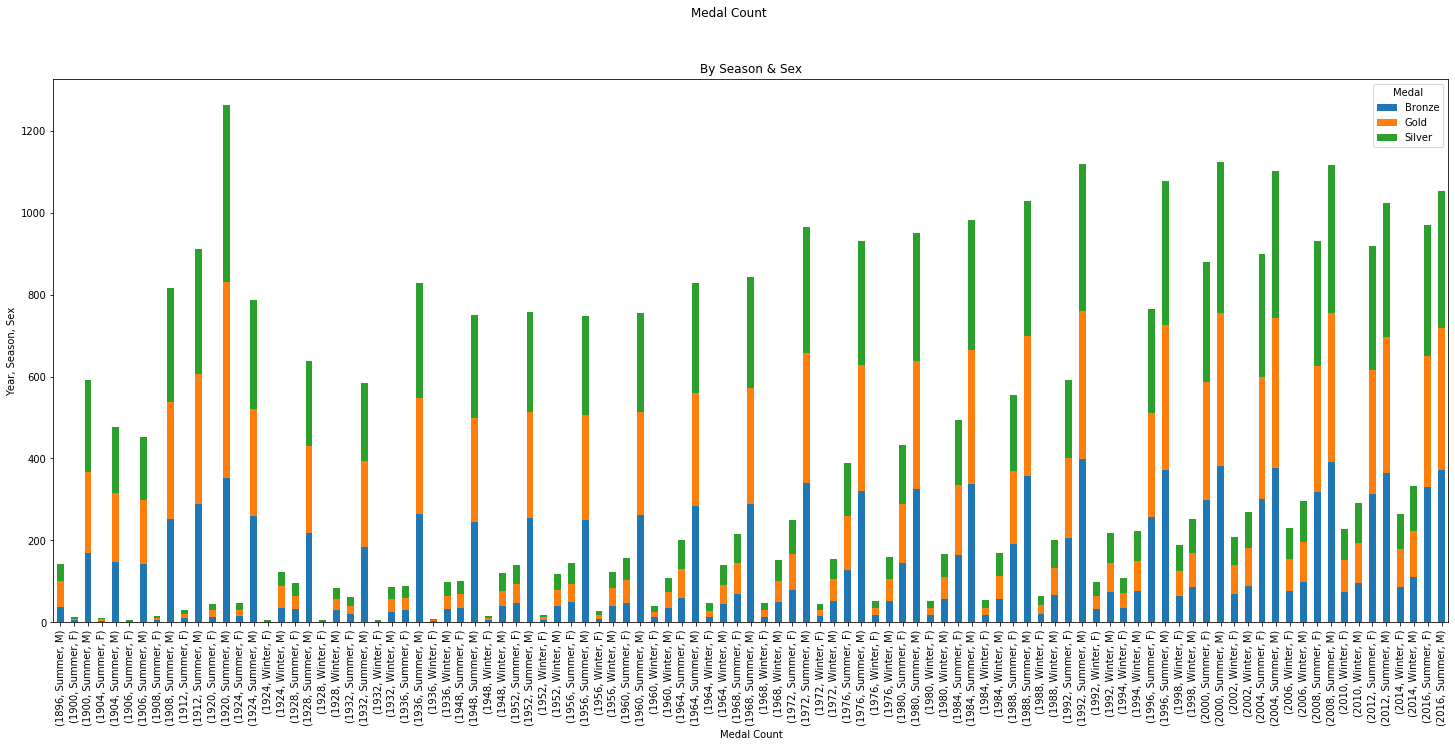

<Figure size 1800x720 with 0 Axes>

In [4]:
plt.rcParams['figure.figsize'] = [25,10]
chart = merge_table.groupby(['Year','Season','Sex','Medal']).size().unstack('Medal').plot(kind='bar', stacked=True)

plt.suptitle('Medal Count')
plt.title('By Season & Sex')
plt.xlabel('Medal Count')
plt.ylabel('Year, Season, Sex')

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig('Medal_Count_by_Year-Season-Sex.png', dpi=100)

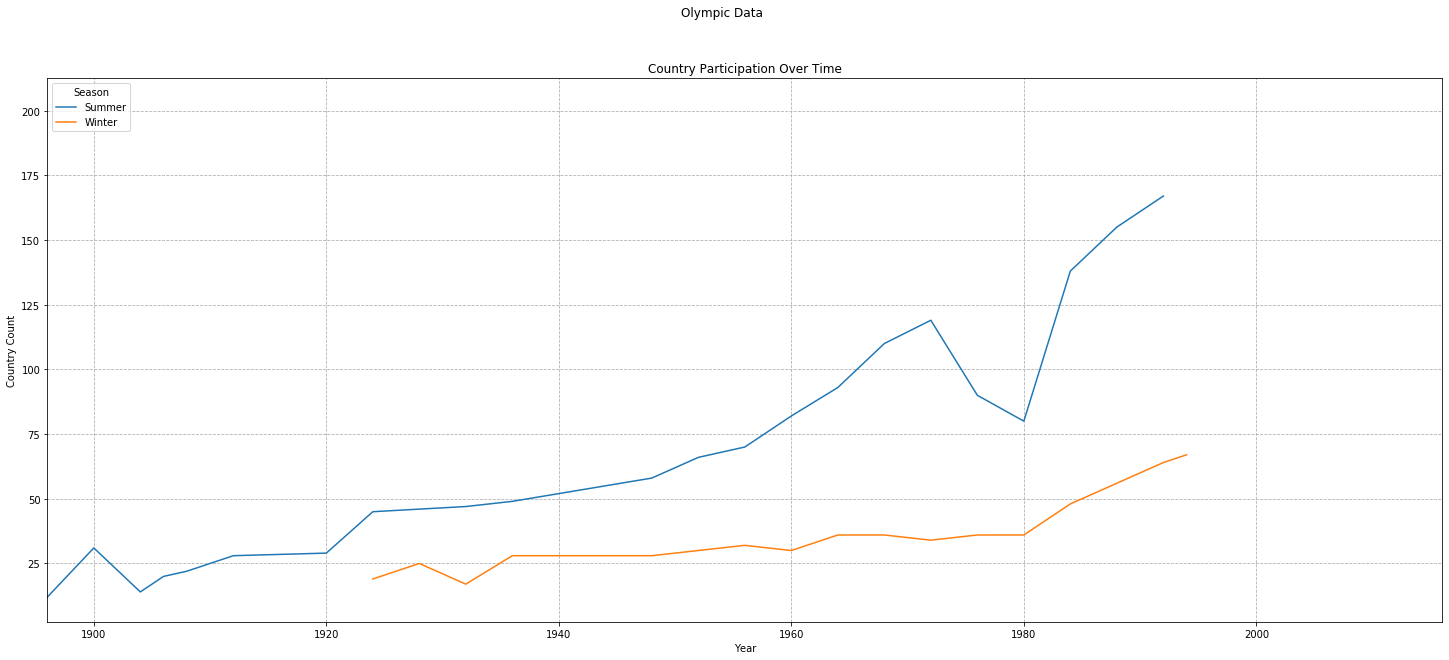

<Figure size 1800x720 with 0 Axes>

In [5]:
grouped_part_df = merge_table.groupby(['Season','Year'])
grouped_part_df = grouped_part_df['Country'].nunique()

chart = grouped_part_df.unstack('Season').plot(kind = "line")

plt.suptitle('Olympic Data')
plt.title('Country Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Country Count')
plt.grid(linestyle="--")

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Country Participation Over Time.png', dpi=100)

plt.show()

#1980 many countries including the US boycotted the USSRs invasion of Afghanastan, the games were in Moscow

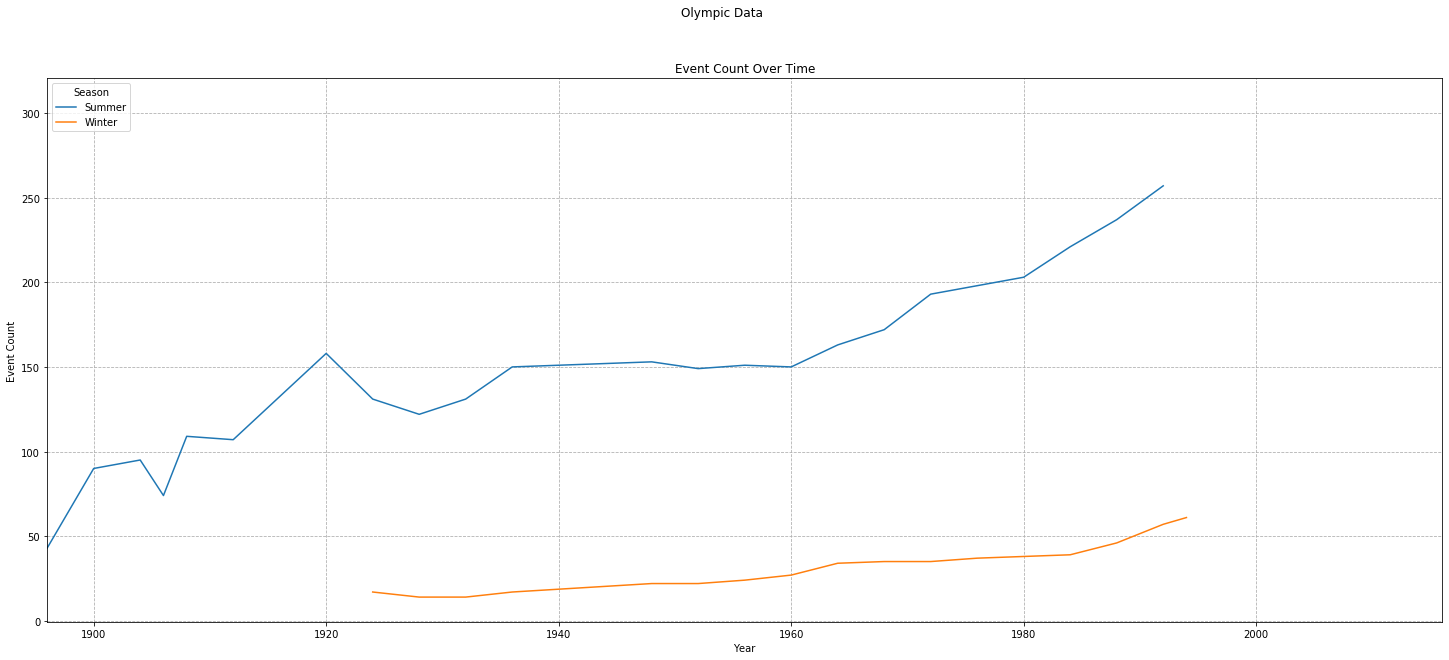

<Figure size 1800x720 with 0 Axes>

In [6]:
grouped_part_df2 = merge_table.groupby(['Season','Year'])
grouped_part_df2 = grouped_part_df2['Event'].nunique()

chart = grouped_part_df2.unstack('Season').plot(kind = "line")

plt.suptitle('Olympic Data')
plt.title('Event Count Over Time')
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.grid(linestyle="--")
#plt.xticks(np.arange(1896, 2019, step=4))

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Event Count Over Time.png', dpi=100)

plt.show()

In [7]:
map_df = merge_table[['Season','Year','Country','Name']]
#map_df = map_df.set_index('Season')
map_df.head()
#SUMMER DF
summer_df = map_df[map_df['Season'].str.contains('Summer')]
summer_df.head()
summer_df = summer_df.groupby(['Year',"Country"], as_index = False)
summer_df = summer_df['Name'].count()
summer_df = pd.DataFrame(summer_df)
summer_df = summer_df[['Country','Year','Name']]
summer_df = summer_df.rename(columns={"Name": "Athlete Count"})
summer_df = summer_df.sort_values(by="Athlete Count", ascending=False)
print("SUMMER DF HEAD")
print(f"Total Countries: {summer_df['Country'].nunique()}")
print(summer_df.head())
#WINTER DF
winter_df = map_df[map_df['Season'].str.contains('Winter')]
winter_df.head()
winter_df = winter_df.groupby(['Year',"Country"], as_index = False)
winter_df = winter_df['Name'].count()
winter_df = pd.DataFrame(winter_df)
winter_df = winter_df[['Country','Year','Name']]
winter_df = winter_df.rename(columns={"Name": "Athlete Count"})
winter_df = winter_df.sort_values(by="Athlete Count", ascending=False)
print("""
WINTER DF HEAD""")
print(f"Total Countries: {winter_df['Country'].nunique()}")
print(winter_df.head())

SUMMER DF HEAD
Total Countries: 205
      Country  Year  Athlete Count
56        USA  1904           1109
22     France  1900           1071
859   Germany  1972           1041
97         UK  1908            972
1299  Germany  1988            918

WINTER DF HEAD
Total Countries: 111
     Country  Year  Athlete Count
1010     USA  2014            367
942   Canada  2014            359
993   Russia  2014            353
926      USA  2010            341
844      USA  2006            325


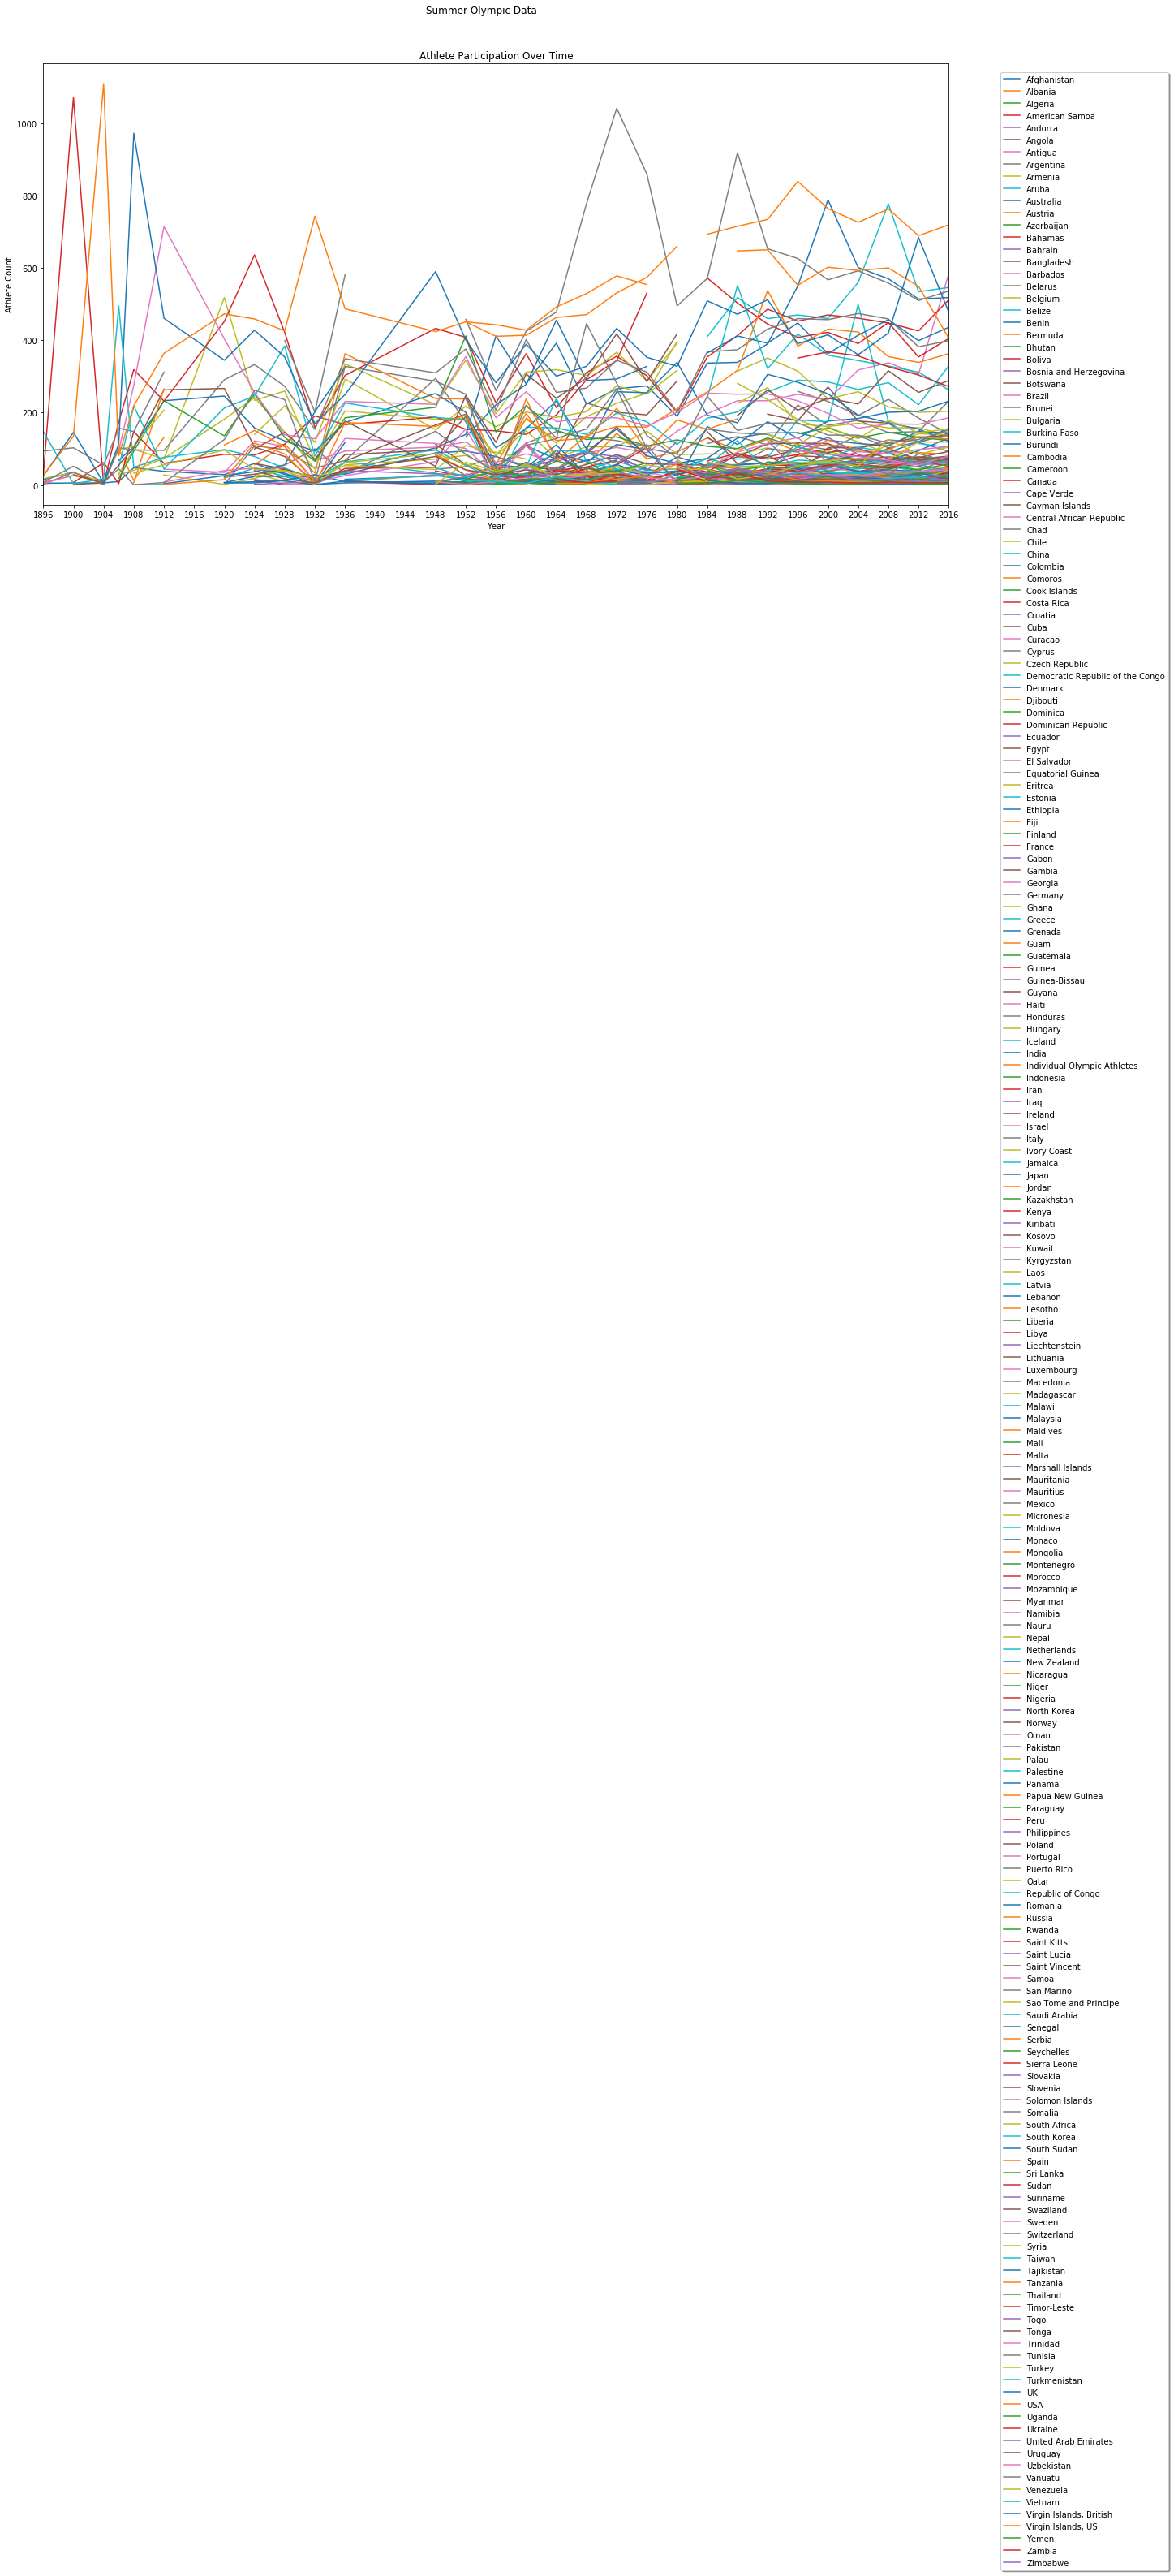

<Figure size 1800x720 with 0 Axes>

In [8]:
summer_chart = summer_df.pivot(index='Year', columns='Country', values="Athlete Count")

summer_chart.plot(figsize=(20,10))

plt.legend(loc='upper center', bbox_to_anchor=(1.15, 0.99), shadow=True, ncol=1)

plt.suptitle('Summer Olympic Data')
plt.title('Athlete Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Athlete Count')
plt.xticks(np.arange(1896, 2019, step=4))

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Athlete Participation Over Time_Summer.png', dpi=100)

plt.show()

#1932 US has most participants - great depression most countries couldn't afford to attend,Blue 1948 spike is UK because they hosted,
#Grey-Germany hosted in '72 (massacre)'
#1980 many countries including the US boycotted the USSRs invasion of Afghanastan, the games were in Moscow
#Blue 1948 spike is UK because they hosted,Germany hosted in '72 (massacre)'

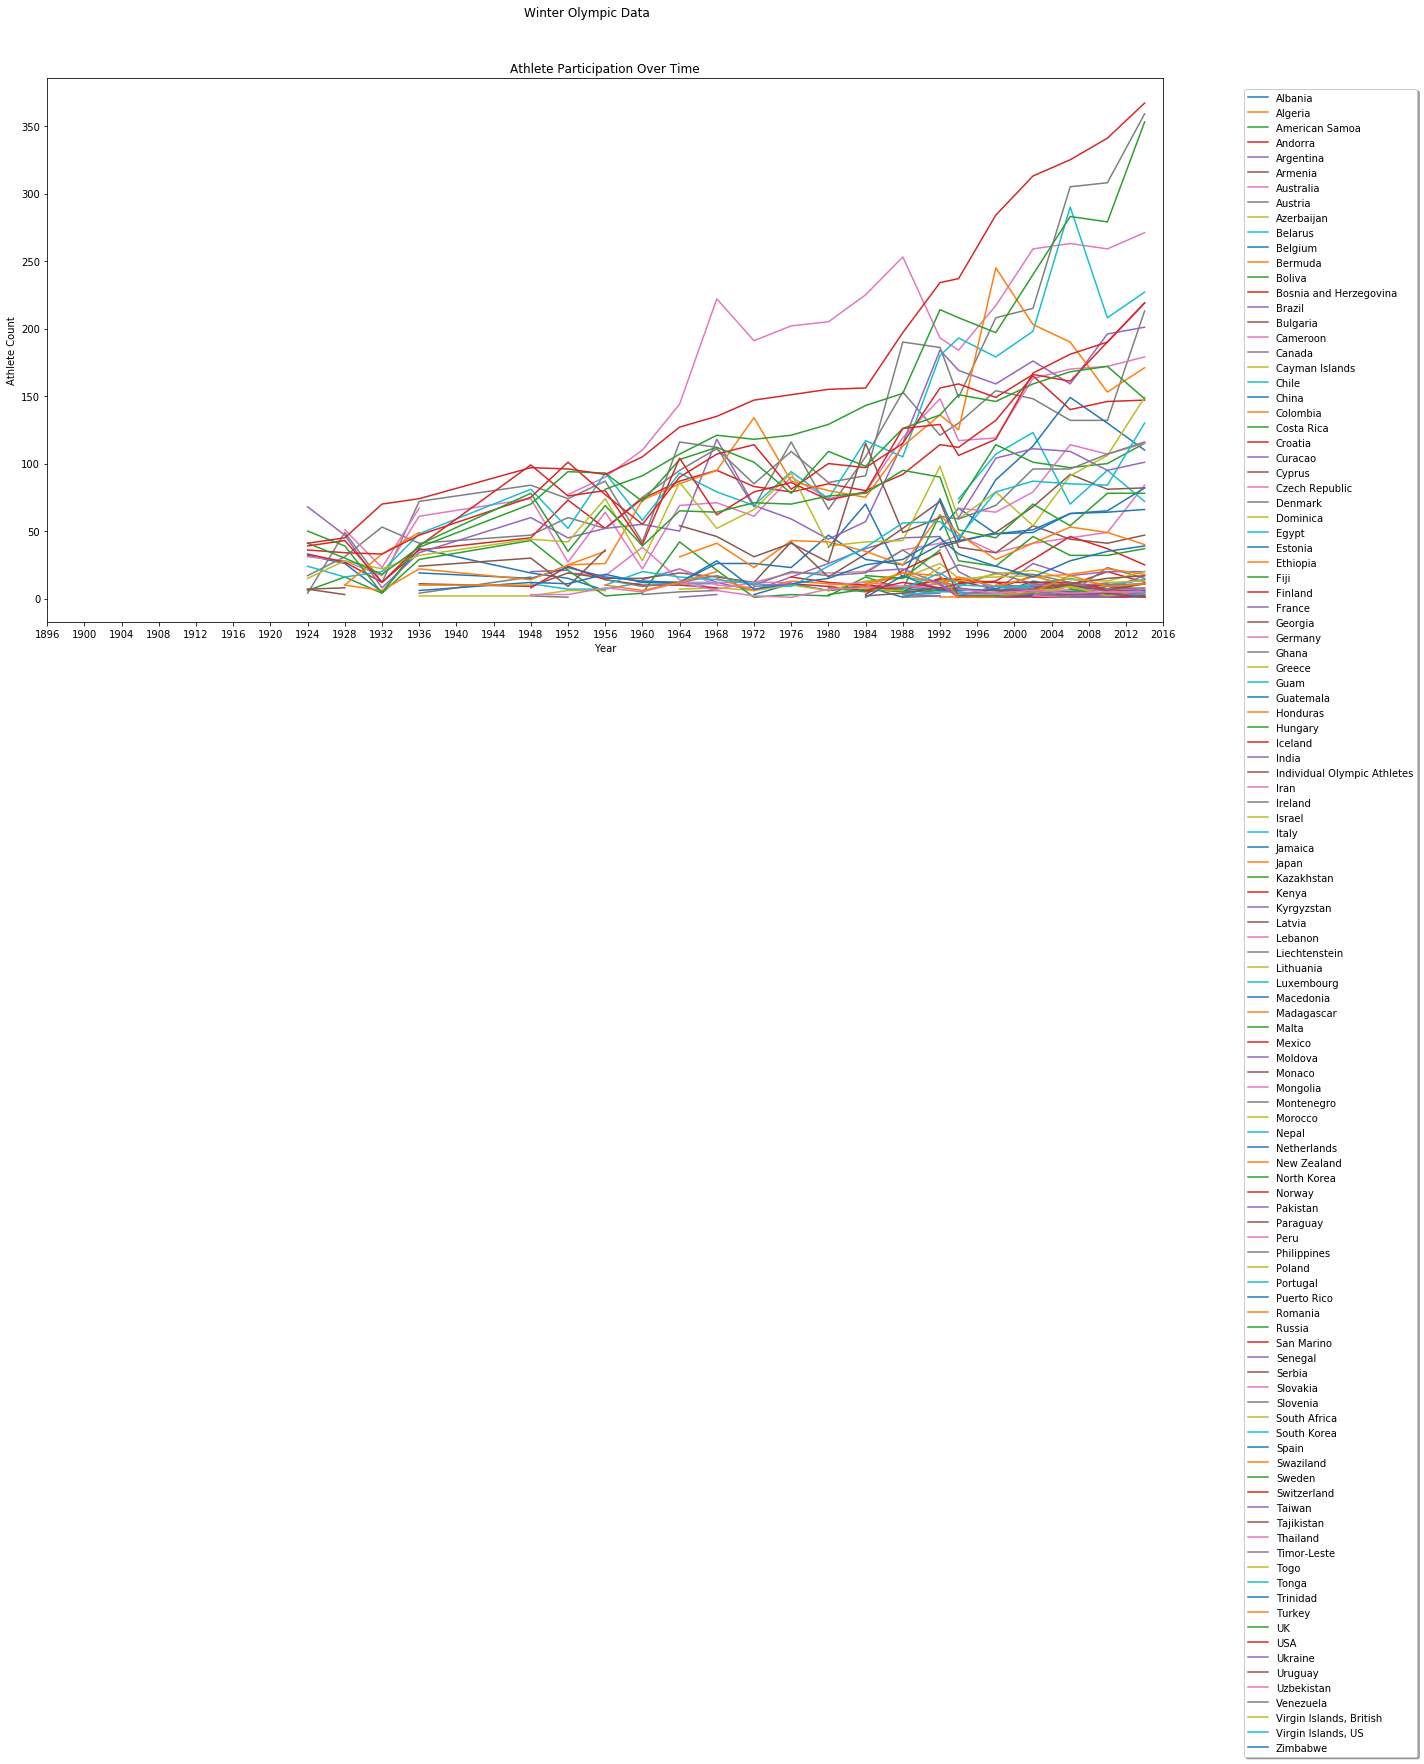

<Figure size 1800x720 with 0 Axes>

In [10]:
winter_chart = winter_df.pivot(index='Year', columns='Country', values="Athlete Count")

fig_winter_chart = winter_chart.plot(figsize=(20,10))

plt.legend(loc='upper center', bbox_to_anchor=(1.15, 0.99), shadow=True, ncol=1)

plt.suptitle('Winter Olympic Data')
plt.title('Athlete Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Athlete Count')
plt.xticks(np.arange(1896, 2019, step=4))

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig('Athlete Participation Over Time_Winter.png', dpi=100)

plt.show()

#Germany was split into E & W 1945-1990 and the combined 2 countries account for Germany in the graph.
#1948 games were hosted in Switzerland which was neatral during warii
#1936 was the Nazi Winter Olympics in Berlin, many countries did not participate in the prior 1932 olympics due to 
# the great depression

In [9]:
##======PETER'S CODE======###
#Creating data frames for relevant years
summer_1900 = (merge_table.loc[merge_table["Games"] == "1900 Summer", :])
summer_1936 = (merge_table.loc[merge_table["Games"] == "1936 Summer", :])
summer_1972 = (merge_table.loc[merge_table["Games"] == "1972 Summer", :])
summer_2008 = (merge_table.loc[merge_table["Games"] == "2008 Summer", :])

winter_1924 = (merge_table.loc[merge_table["Games"] == "1924 Winter", :])
winter_1948 = (merge_table.loc[merge_table["Games"] == "1948 Winter", :])
winter_1972 = (merge_table.loc[merge_table["Games"] == "1972 Winter", :])
winter_2006 = (merge_table.loc[merge_table["Games"] == "2006 Winter", :])


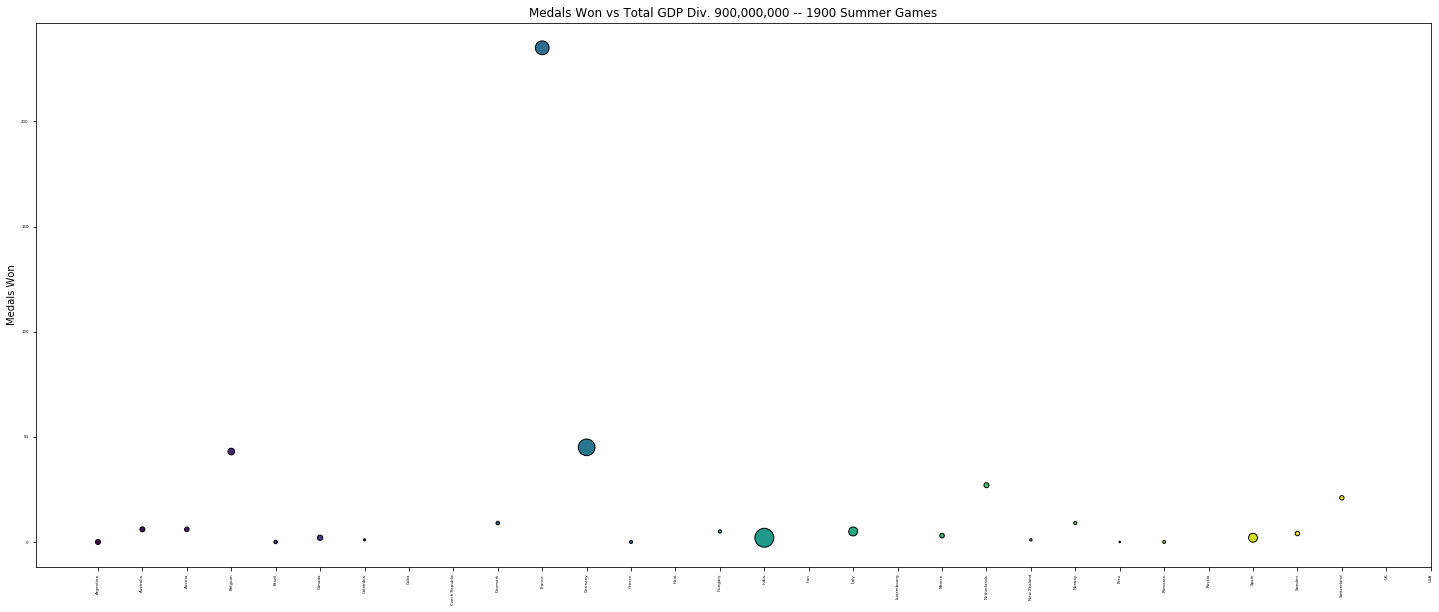

In [10]:
#1900 summer olympics

#creating necessary lists
country_names_1900 = []
gdp_by_country_1900 = []
medal_counts_1900 = []
colors = []

#creating necessary data frames
grouped_summer_1900 = summer_1900.groupby("Country")
grouped_counts = grouped_summer_1900.count().reset_index()
grouped_means = grouped_summer_1900.mean().reset_index()

#creating necessary variables
x_axis = np.arange(1, len(grouped_counts)+1, 1)
y_axis = grouped_counts["Medal"]
reset_index = grouped_means.reset_index()
labels = reset_index["Country"]
size = grouped_means["Total GDP"] / 900000000
colors = np.arange(1, len(grouped_counts)+1, 1)

#plotting data points
plt.scatter(x_axis, y_axis, s=size, marker="o", c=colors, edgecolors="black")

#adding labels to the graphs
plt.title("Medals Won vs Total GDP Div. 900,000,000 -- 1900 Summer Games")
plt.ylabel("Medals Won")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

#saving figure
plt.savefig("1900 Summer Games Total GDP (Div. 900,000,000) vs Medals Won", format="eps")

#showing the graph
plt.show()

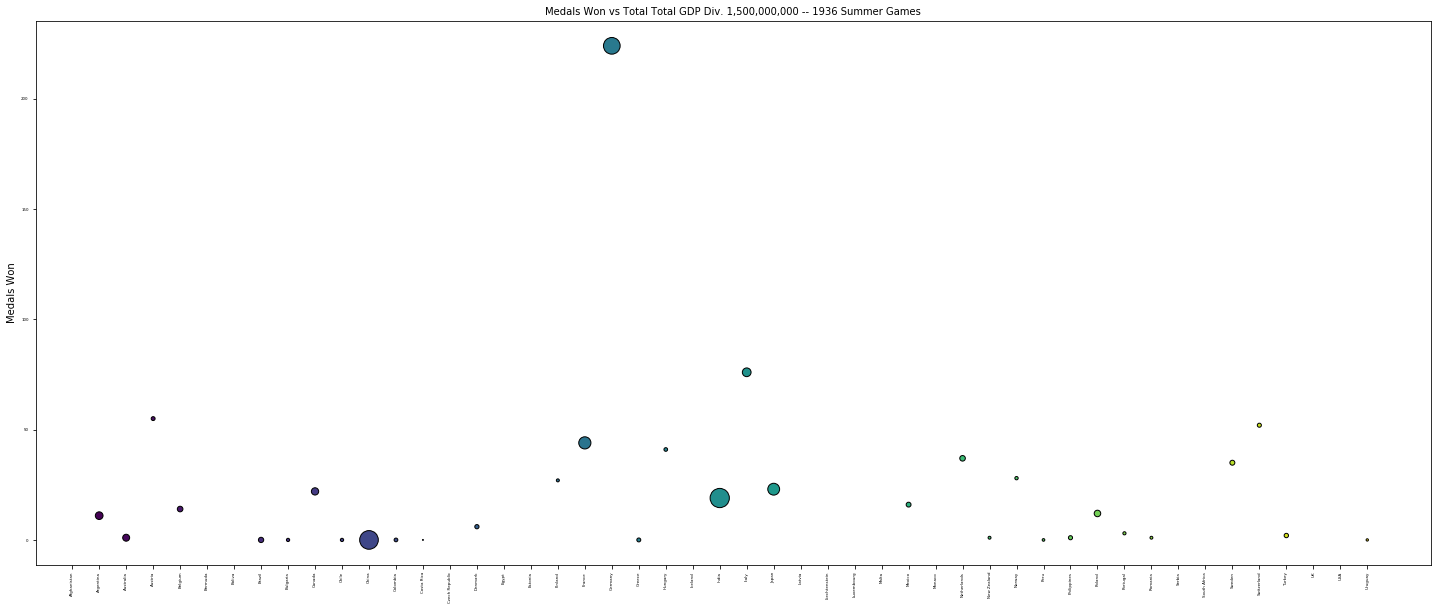

In [11]:
#1936 summer olympics

#creating necessary lists
country_names_1936 = []
gdp_by_country_1936 = []
medal_counts_1936 = []
colors = []

#creating necessary data frames
grouped_summer_1936 = summer_1936.groupby("Country")
grouped_counts = grouped_summer_1936.count().reset_index()
grouped_means = grouped_summer_1936.mean().reset_index()

#creating necessary variables
x_axis = np.arange(1, len(grouped_counts)+1, 1)
y_axis = grouped_counts["Medal"]
reset_index = grouped_means.reset_index()
labels = reset_index["Country"]
size = grouped_means["Total GDP"] / 1500000000
colors = np.arange(1, len(grouped_counts)+1, 1)

#plotting data points
plt.scatter(x_axis, y_axis, s=size, marker="o", c=colors, edgecolors="black")

#adding labels to the graphs
plt.title("Medals Won vs Total Total GDP Div. 1,500,000,000 -- 1936 Summer Games", fontsize=10)
plt.ylabel("Medals Won")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

#saving figure
plt.savefig("1936 Summer Games Total GDP (Div. 1,500,000,000) vs Medals Won", format="eps")

#showing the graph
plt.show()

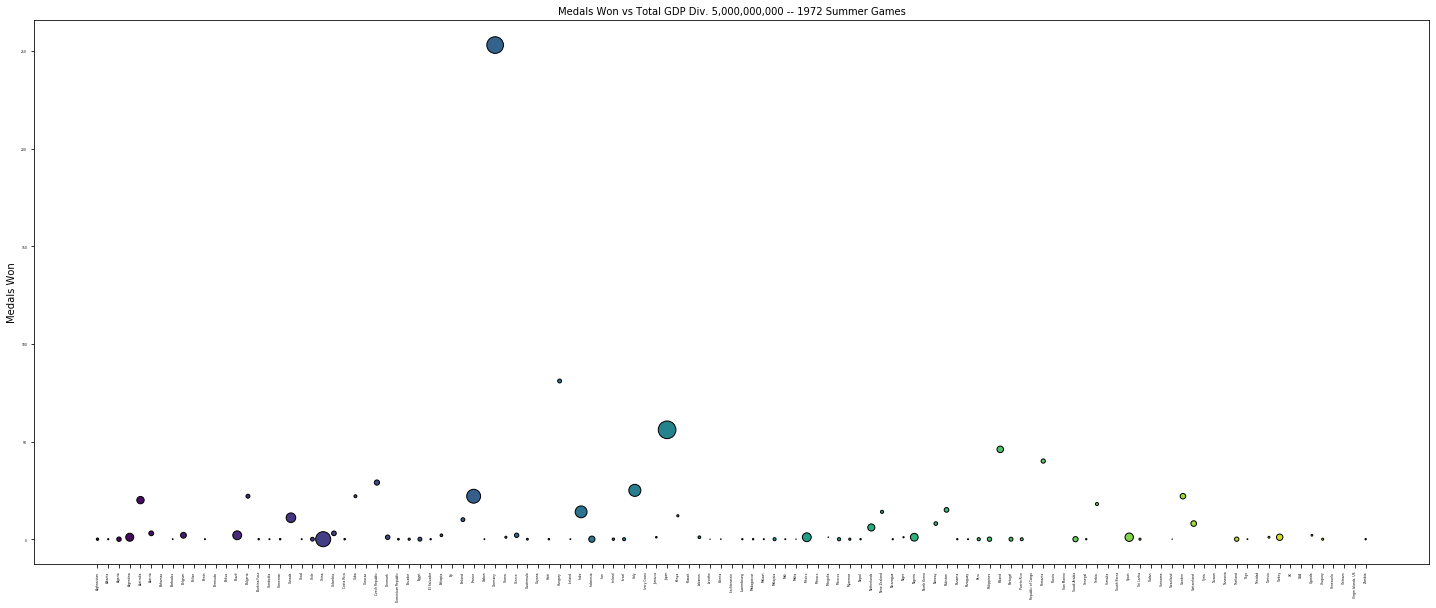

In [12]:
#1972 summer olympics

#creating necessary lists
country_names_1972 = []
gdp_by_country_1972 = []
medal_counts_1972 = []
colors = []

#creating necessary data frames
grouped_summer_1972 = summer_1972.groupby("Country")
grouped_counts = grouped_summer_1972.count().reset_index()
grouped_means = grouped_summer_1972.mean().reset_index()

#creating necessary variables
x_axis = np.arange(1, len(grouped_counts)+1, 1)
y_axis = grouped_counts["Medal"]
reset_index = grouped_means.reset_index()
labels = reset_index["Country"]
size = grouped_means["Total GDP"] / 5000000000
colors = np.arange(1, len(grouped_counts)+1, 1)

#plotting data points
plt.scatter(x_axis, y_axis, s=size, marker="o", c=colors, edgecolors="black")

#adding labels to the graphs
plt.title("Medals Won vs Total GDP Div. 5,000,000,000 -- 1972 Summer Games", fontsize=10)
plt.ylabel("Medals Won")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=3)

plt.savefig("1972 Summer Games Total GDP (Div. 5,000,000,000) vs Medals Won", format="eps")

#showing the graph
plt.show()

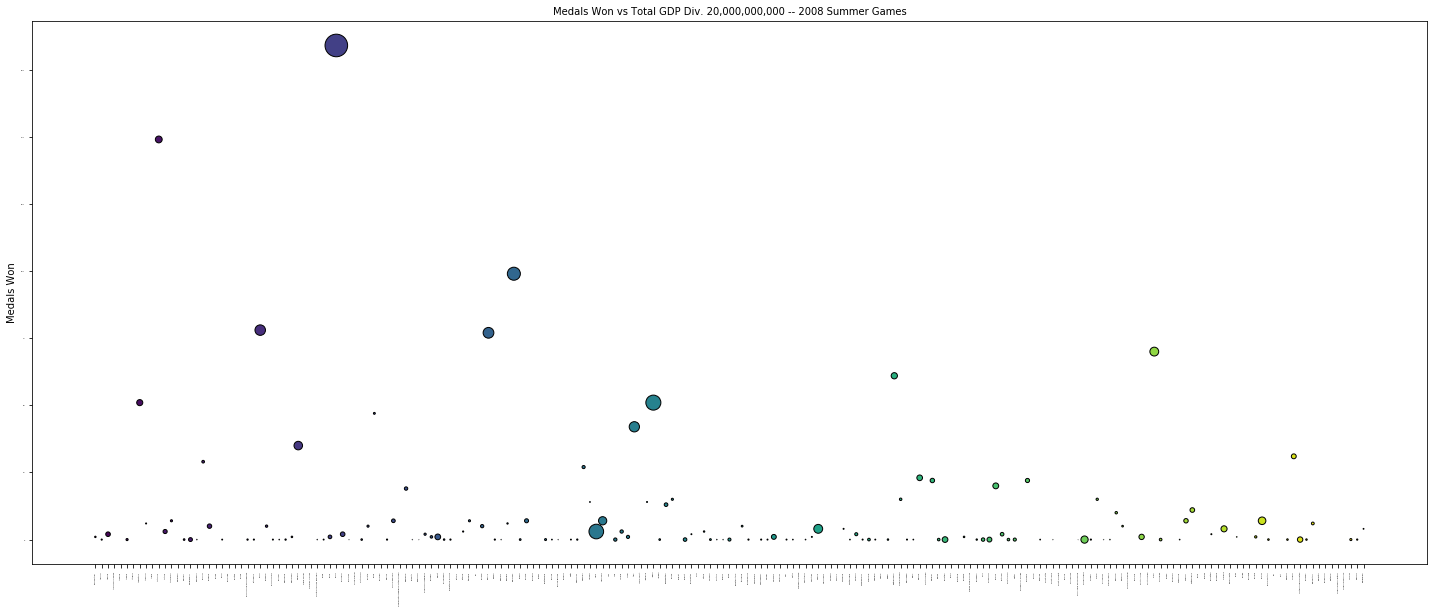

In [13]:
#2008 summer olympics

#creating necessary lists
country_names_2008 = []
gdp_by_country_2008 = []
medal_counts_2008 = []
colors = []

#creating necessary data frames
grouped_summer_2008 = summer_2008.groupby("Country")
grouped_counts = grouped_summer_2008.count().reset_index()
grouped_means = grouped_summer_2008.mean().reset_index()

#creating necessary variables
x_axis = np.arange(1, len(grouped_counts)+1, 1)
y_axis = grouped_counts["Medal"]
reset_index = grouped_means.reset_index()
labels = reset_index["Country"]
size = grouped_means["Total GDP"] / 20000000000
colors = np.arange(1, len(grouped_counts)+1, 1)

#plotting data points
plt.scatter(x_axis, y_axis, s=size, marker="o", c=colors, edgecolors="black")

#adding labels to the graphs
plt.title("Medals Won vs Total GDP Div. 20,000,000,000 -- 2008 Summer Games", fontsize=10)
plt.ylabel("Medals Won")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=2)

plt.savefig("2008 Summer Games Total GDP (Div. 20,000,000,000) vs Medals Won", format="eps")

#showing the graph
plt.show()

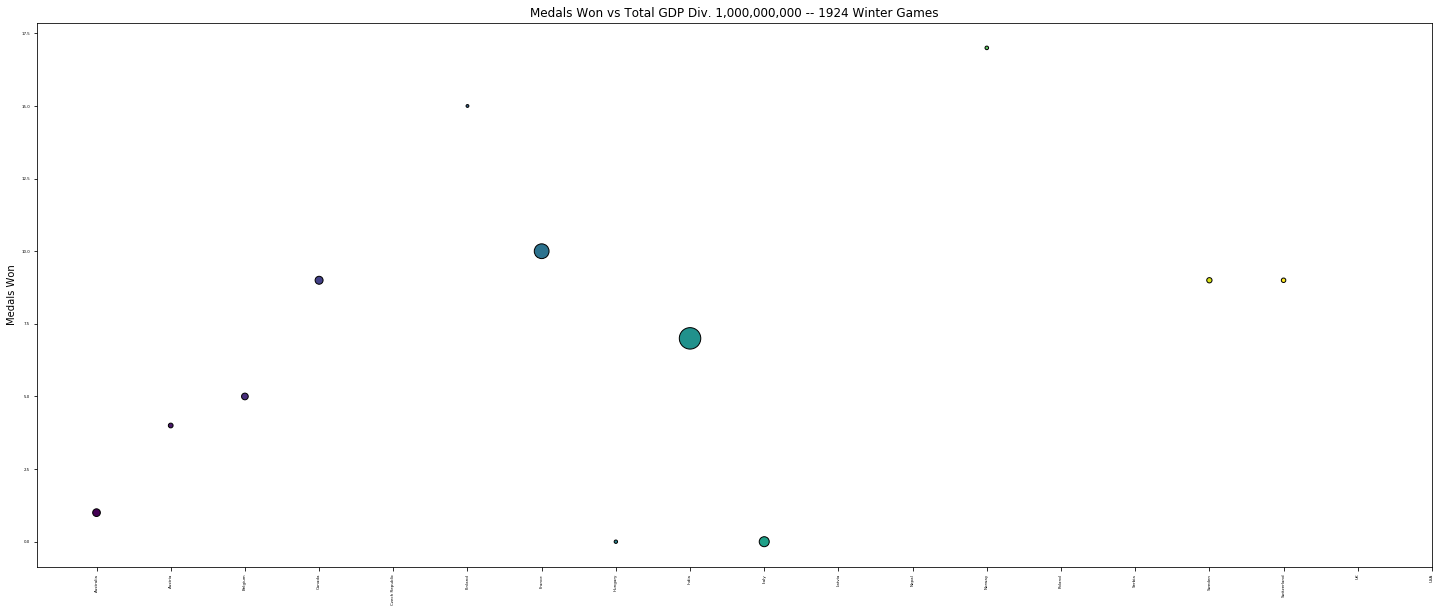

In [14]:
#1924 Winter Olympics

#creating necessary lists
country_names_1924 = []
gdp_by_country_1924 = []
medal_counts_1924 = []
colors = []

#creating necessary data frames
grouped_winter_1924 = winter_1924.groupby("Country")
grouped_counts = grouped_winter_1924.count().reset_index()
grouped_means = grouped_winter_1924.mean().reset_index()

#creating necessary variables
x_axis = np.arange(1, len(grouped_counts)+1, 1)
y_axis = grouped_counts["Medal"]
reset_index = grouped_means.reset_index()
labels = reset_index["Country"]
size = grouped_means["Total GDP"] / 1000000000
colors = np.arange(1, len(grouped_counts)+1, 1)

#plotting data points
plt.scatter(x_axis, y_axis, s=size, marker="o", c=colors, edgecolors="black")

#adding labels to the graphs
plt.title("Medals Won vs Total GDP Div. 1,000,000,000 -- 1924 Winter Games")
plt.ylabel("Medals Won")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

plt.savefig("1924 Winter Games Total GDP (Div. 1,000,000,000) vs Medals Won", format="eps")

#showing the graph
plt.show()

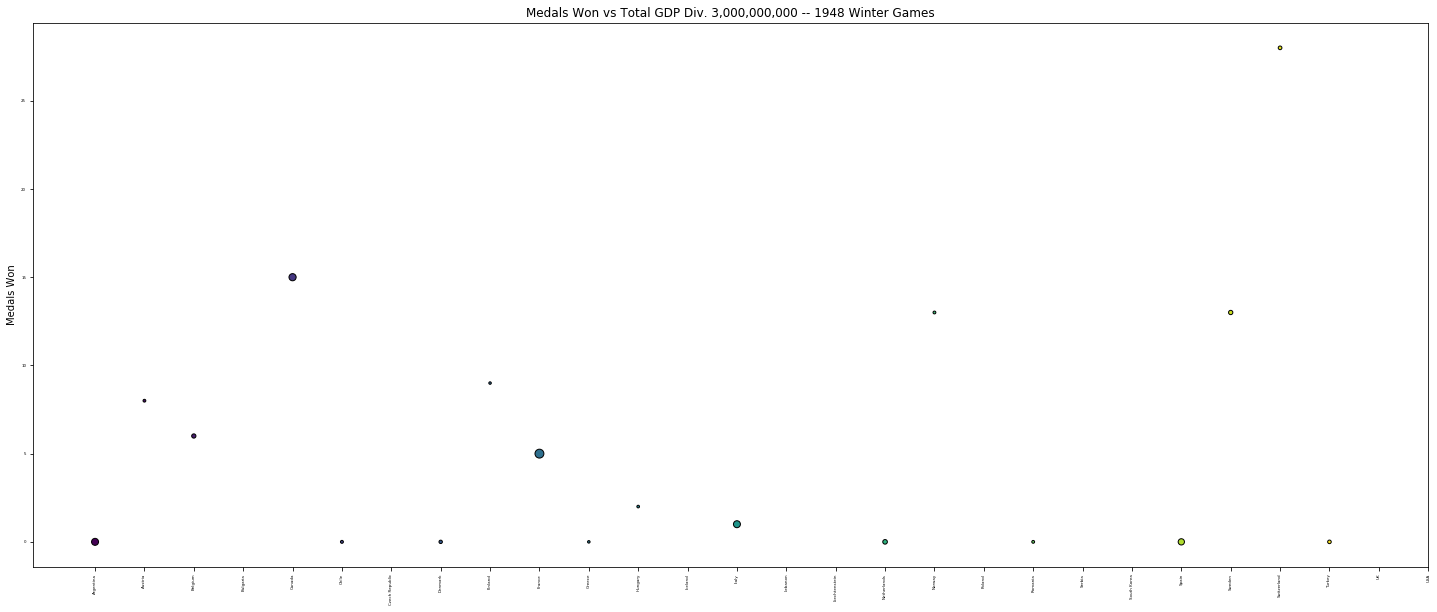

In [15]:
#1948 Winter Olympics

#creating necessary lists
country_names_1948 = []
gdp_by_country_1948 = []
medal_counts_1948 = []
colors = []

#creating necessary data frames
grouped_winter_1948 = winter_1948.groupby("Country")
grouped_counts = grouped_winter_1948.count().reset_index()
grouped_means = grouped_winter_1948.mean().reset_index()

#creating necessary variables
x_axis = np.arange(1, len(grouped_counts)+1, 1)
y_axis = grouped_counts["Medal"]
reset_index = grouped_means.reset_index()
labels = reset_index["Country"]
size = grouped_means["Total GDP"] / 3000000000
colors = np.arange(1, len(grouped_counts)+1, 1)

#plotting data points
plt.scatter(x_axis, y_axis, s=size, marker="o", c=colors, edgecolors="black")

#adding labels to the graphs
plt.title("Medals Won vs Total GDP Div. 3,000,000,000 -- 1948 Winter Games")
plt.ylabel("Medals Won")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

plt.savefig("1948 Winter Games Total GDP (Div. 3,000,000,000) vs Medals Won", format="eps")

#showing the graph
plt.show()

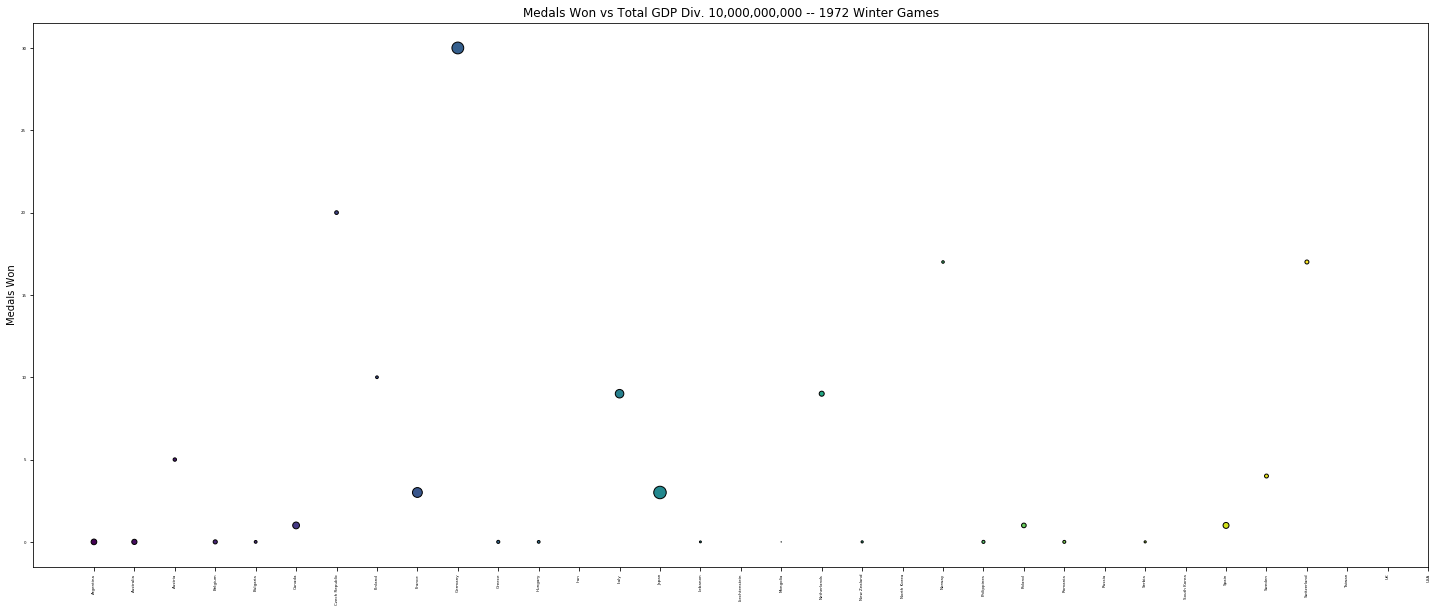

In [16]:
#1972 Winter Olympics

#creating necessary lists
country_names_1972 = []
gdp_by_country_1972 = []
medal_counts_1972 = []
colors = []

#creating necessary data frames
grouped_winter_1972 = winter_1972.groupby("Country")
grouped_counts = grouped_winter_1972.count().reset_index()
grouped_means = grouped_winter_1972.mean().reset_index()

#creating necessary variables
x_axis = np.arange(1, len(grouped_counts)+1, 1)
y_axis = grouped_counts["Medal"]
reset_index = grouped_means.reset_index()
labels = reset_index["Country"]
size = grouped_means["Total GDP"] / 10000000000
colors = np.arange(1, len(grouped_counts)+1, 1)

#plotting data points
plt.scatter(x_axis, y_axis, s=size, marker="o", c=colors, edgecolors="black")

#adding labels to the graphs
plt.title("Medals Won vs Total GDP Div. 10,000,000,000 -- 1972 Winter Games")
plt.ylabel("Medals Won")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

plt.savefig("1972 Winter Games Total GDP (Div. 10,000,000,000) vs Medals Won", format="eps")

#showing the graph
plt.show()

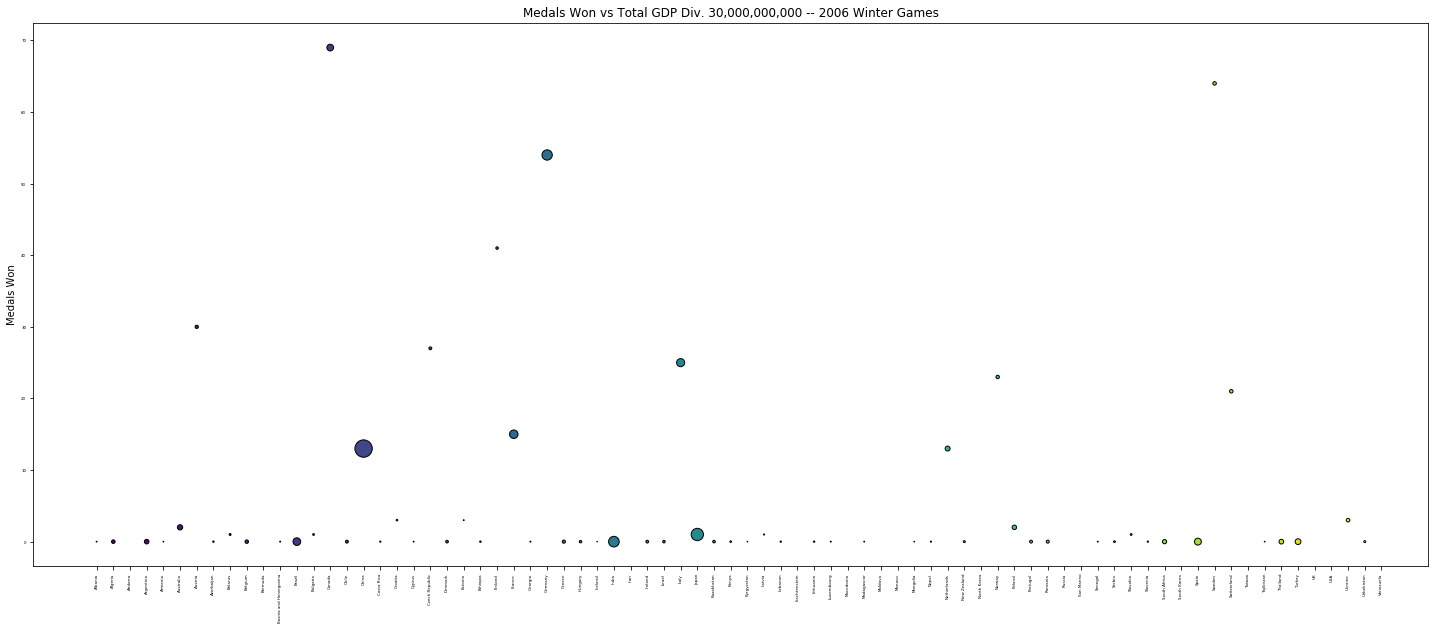

In [17]:
#2006 Winter Olympics

#creating necessary lists
country_names_2006 = []
gdp_by_country_2006 = []
medal_counts_2006 = []
colors = []

#creating necessary data frames
grouped_winter_2006 = winter_2006.groupby("Country")
grouped_counts = grouped_winter_2006.count().reset_index()
grouped_means = grouped_winter_2006.mean().reset_index()

#creating necessary variables
x_axis = np.arange(1, len(grouped_counts)+1, 1)
y_axis = grouped_counts["Medal"]
reset_index = grouped_means.reset_index()
labels = reset_index["Country"]
size = grouped_means["Total GDP"] / 30000000000
colors = np.arange(1, len(grouped_counts)+1, 1)

#plotting data points
plt.scatter(x_axis, y_axis, s=size, marker="o", c=colors, edgecolors="black")

#adding labels to the graphs
plt.title("Medals Won vs Total GDP Div. 30,000,000,000 -- 2006 Winter Games")
plt.ylabel("Medals Won")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

#saving figure
plt.savefig("2006 Winter Games Total GDP (Div. 30,000,000,000) vs Medals Won", format="eps")

#showing the graph
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


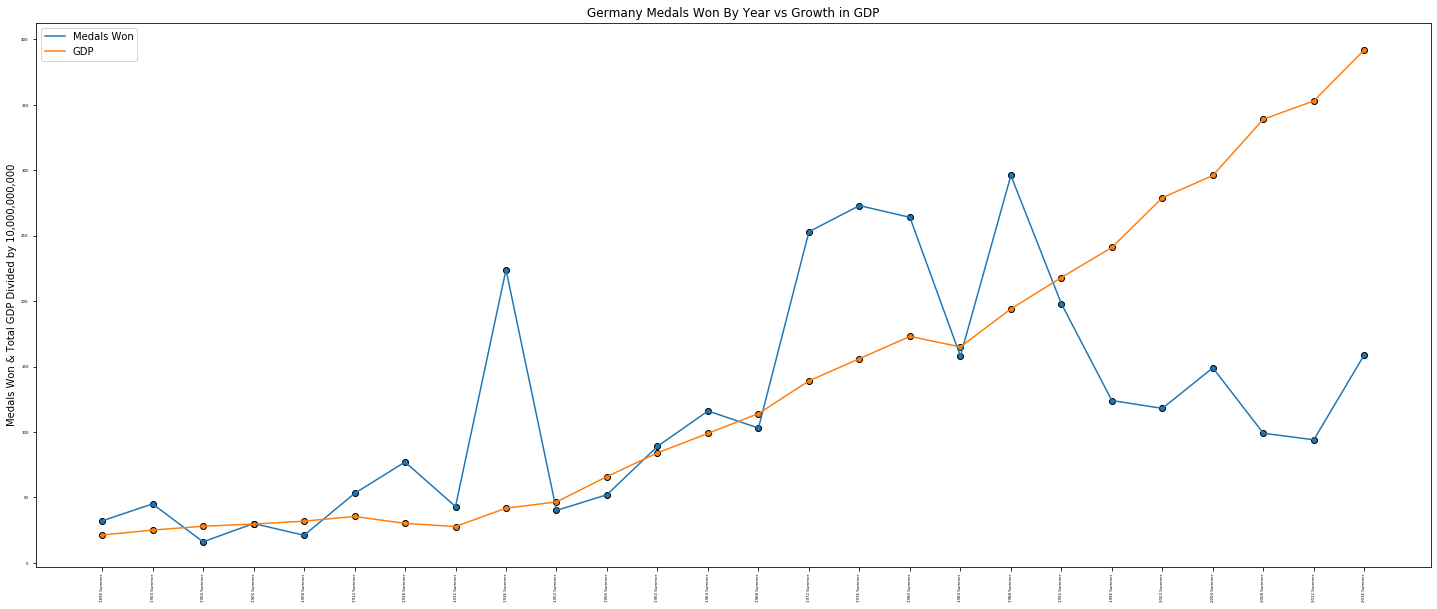

----------------------------------------------------------------------------------
The Correlation Coefficient between Medals Won and Total GDP Growth by Year for Germany is 0.42


In [18]:
#Germany Medal Winnings Over Time

#Creating data frame for only Germany
germany_df = (merge_table.loc[merge_table["Country"] == "Germany", :])

#Looking at only summer olympics
germany_summer_df = (germany_df.loc[germany_df["Season"] == "Summer", :])
grouped_germany_df = germany_summer_df.groupby("Games")
grouped_germany_counts = grouped_germany_df.count()

#creating necessarily variables
x_axis = np.arange(1, len(grouped_germany_df)+1, 1)
y_axis = grouped_germany_counts["Medal"]
y_axis2 = grouped_germany_df["Total GDP"].mean() / 10000000000
reset_index = grouped_germany_counts.reset_index()
labels = reset_index["Games"]

#plotting data points
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.scatter(x_axis, y_axis2, marker="o", edgecolors="black")

#adding labels to the graph
plt.title("Germany Medals Won By Year vs Growth in GDP")
plt.ylabel("Medals Won & Total GDP Divided by 10,000,000,000")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

#adding lines between the data points
plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis2)

#adding a legend
plt.legend(loc=0, labels=["Medals Won", "GDP"])

#saving figure
plt.savefig("Germany Total GDP (Div. 10,000,000,000) vs Medals Won By Year", format="eps")

#showing the graph
plt.show()

#finding correlation coefficient between these two variables
r = st.pearsonr(y_axis, y_axis2)
print("----------------------------------------------------------------------------------")
print(f"The Correlation Coefficient between Medals Won and Total GDP Growth by Year for Germany is {round(r[0],2)}")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


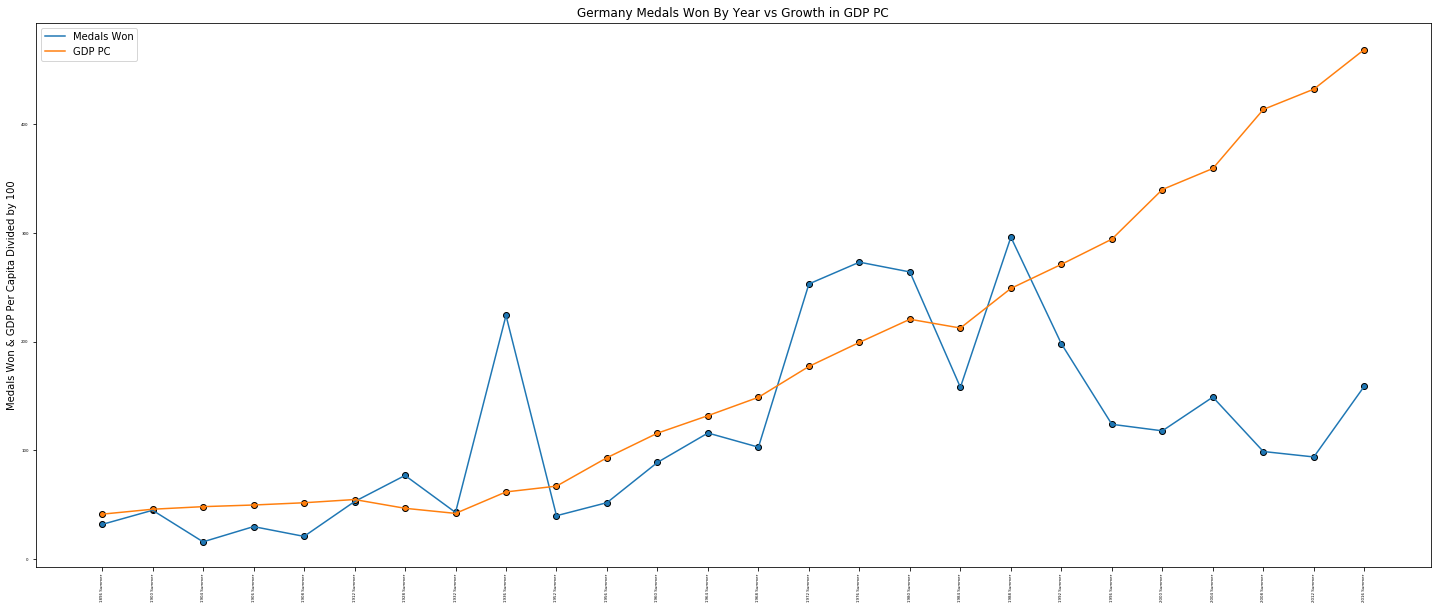

----------------------------------------------------------------------------------
The Correlation Coefficient between Medals Won and GDP Per Capita Growth by Year for Germany is 0.43


In [19]:
#Germany Medal Winnings Over Time by GDP PC

#Creating data frame for only germany
germany_df = (merge_table.loc[merge_table["Country"] == "Germany", :])

#Looking at only summer olympics
germany_summer_df = (germany_df.loc[germany_df["Season"] == "Summer", :])
grouped_germany_df = germany_summer_df.groupby("Games")
grouped_germany_counts = grouped_germany_df.count()

#creating necessarily variables
x_axis = np.arange(1, len(grouped_germany_df)+1, 1)
y_axis = grouped_germany_counts["Medal"]
y_axis2 = grouped_germany_df["GDP PC"].mean() / 100
reset_index = grouped_germany_counts.reset_index()
labels = reset_index["Games"]

#plotting data points
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.scatter(x_axis, y_axis2, marker="o", edgecolors="black")

#adding labels to the graph
plt.title("Germany Medals Won By Year vs Growth in GDP PC")
plt.ylabel("Medals Won & GDP Per Capita Divided by 100")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

#adding lines between the data points
plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis2)

#adding a legend
plt.legend(loc=0, labels=["Medals Won", "GDP PC"])

#saving figure
plt.savefig("Germany Total GDP PC vs Medals Won By Year", format="eps")

#showing the graph
plt.show()

#finding correlation coefficient between these two variables
r = st.pearsonr(y_axis, y_axis2)
print("----------------------------------------------------------------------------------")
print(f"The Correlation Coefficient between Medals Won and GDP Per Capita Growth by Year for Germany is {round(r[0],2)}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


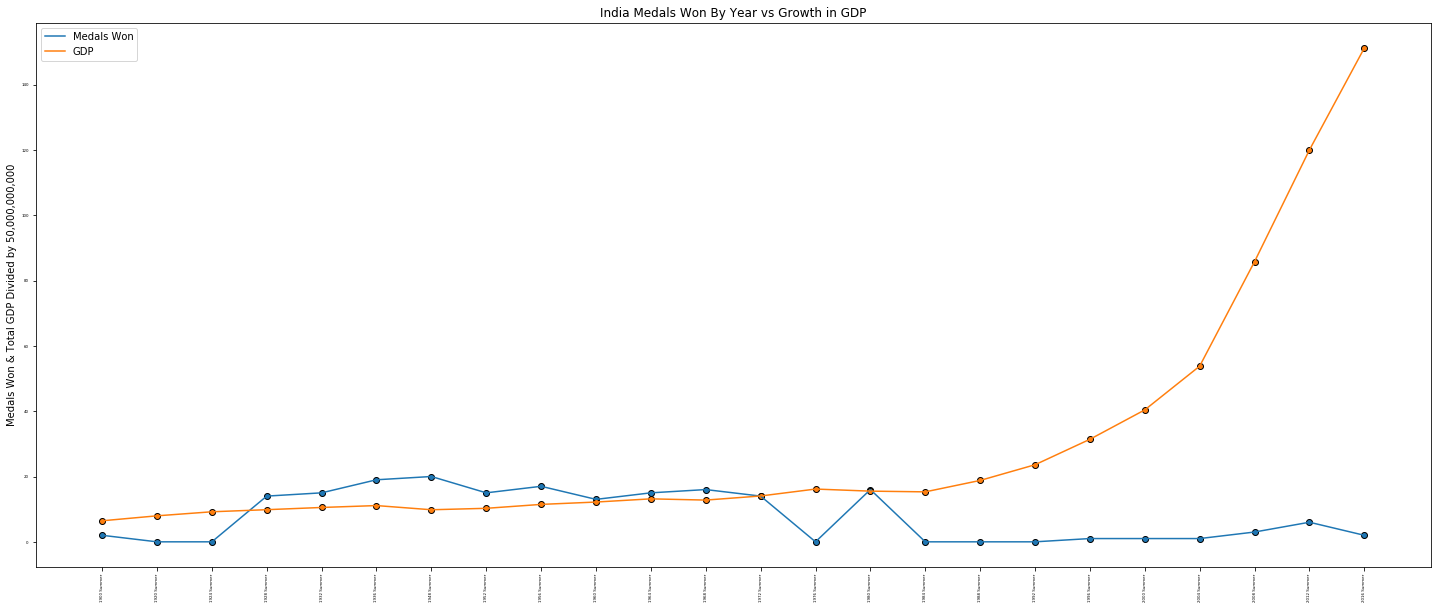

----------------------------------------------------------------------------------
The Correlation Coefficient between Medals Won and GDP Growth by Year for India is -0.33


In [20]:
#India Medal Winnings Over Time

#Creating data frame for only India
india_df = (merge_table.loc[merge_table["Country"] == "India", :])

#Looking at only summer olympics
india_summer_df = (india_df.loc[india_df["Season"] == "Summer", :])
grouped_india_df = india_summer_df.groupby("Games")
grouped_india_counts = grouped_india_df.count()

#creating necessarily variables
x_axis = np.arange(1, len(grouped_india_df)+1, 1)
y_axis = grouped_india_counts["Medal"]
y_axis2 = grouped_india_df["Total GDP"].mean() / 50000000000
reset_index = grouped_india_counts.reset_index()
labels = reset_index["Games"]

#plotting data points
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.scatter(x_axis, y_axis2, marker="o", edgecolors="black")

#adding labels to the graph
plt.title("India Medals Won By Year vs Growth in GDP")
plt.ylabel("Medals Won & Total GDP Divided by 50,000,000,000")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

#adding lines between the data points
plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis2)

#adding a legend
plt.legend(loc=0, labels=["Medals Won", "GDP"])

#saving figure
plt.savefig("India Total GDP (Div. 50,000,000,000) vs Medals Won By Year", format="eps")

#showing the graph
plt.show()

#finding correlation coefficient between these two variables
r = st.pearsonr(y_axis, y_axis2)
print("----------------------------------------------------------------------------------")
print(f"The Correlation Coefficient between Medals Won and GDP Growth by Year for India is {round(r[0],2)}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


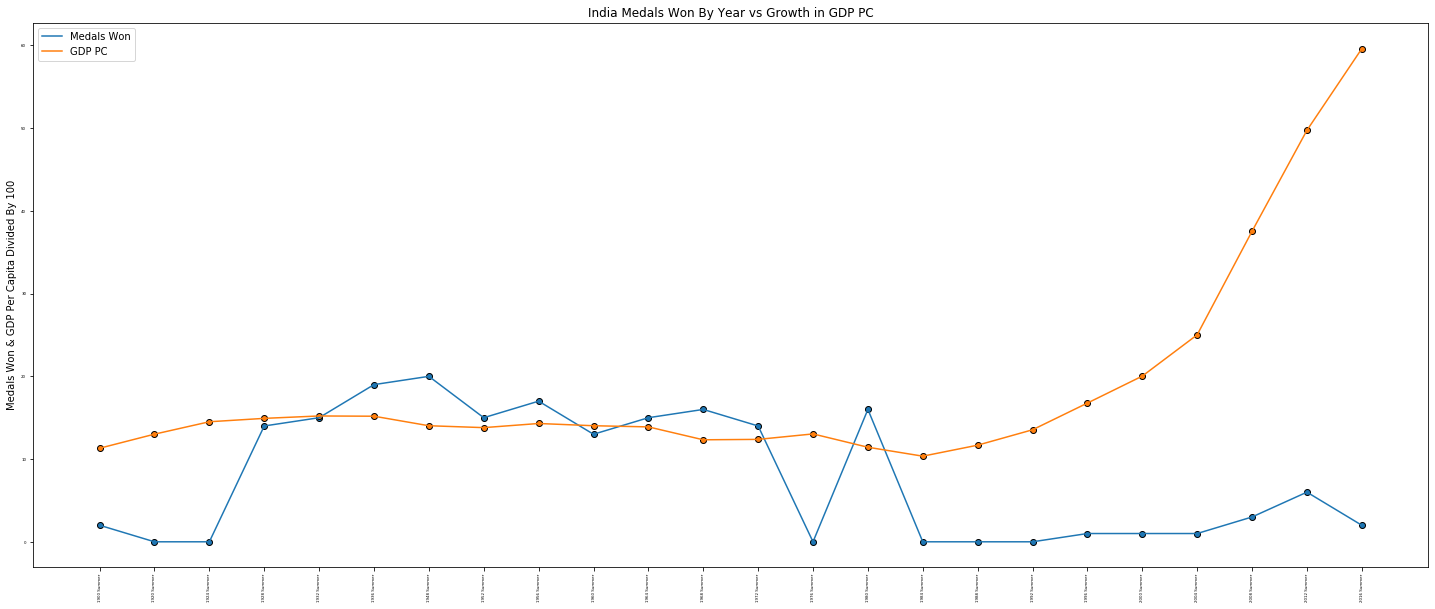

----------------------------------------------------------------------------------
The Correlation Coefficient between Medals Won and GDP Per Capita Growth by Year for India is -0.24


In [21]:
#India Medal Winnings Over Time

#Creating data frame for only India
india_df = (merge_table.loc[merge_table["Country"] == "India", :])

#Looking at only summer olympics
india_summer_df = (india_df.loc[india_df["Season"] == "Summer", :])
grouped_india_df = india_summer_df.groupby("Games")
grouped_india_counts = grouped_india_df.count()

#creating necessarily variables
x_axis = np.arange(1, len(grouped_india_df)+1, 1)
y_axis = grouped_india_counts["Medal"]
y_axis2 = grouped_india_df["GDP PC"].mean() / 100
reset_index = grouped_india_counts.reset_index()
labels = reset_index["Games"]

#plotting data points
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.scatter(x_axis, y_axis2, marker="o", edgecolors="black")

#adding labels to the graph
plt.title("India Medals Won By Year vs Growth in GDP PC")
plt.ylabel("Medals Won & GDP Per Capita Divided By 100")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

#adding lines between the data points
plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis2)

#adding a legend
plt.legend(loc=0, labels=["Medals Won", "GDP PC"])

#saving figure
plt.savefig("India GDP PC vs Medals Won By Year", format="eps")

#showing the graph
plt.show()

#finding correlation coefficient between these two variables
r = st.pearsonr(y_axis, y_axis2)
print("----------------------------------------------------------------------------------")
print(f"The Correlation Coefficient between Medals Won and GDP Per Capita Growth by Year for India is {round(r[0],2)}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


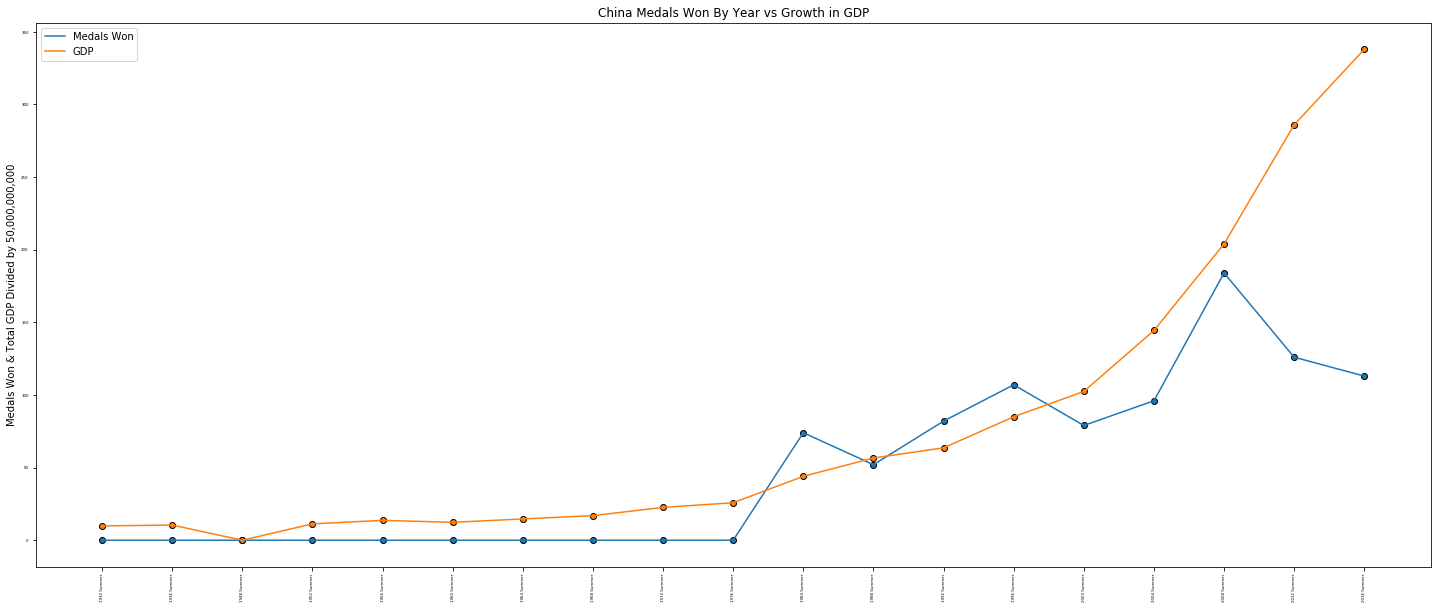

----------------------------------------------------------------------------------
The Correlation Coefficient between Medals Won and GDP Growth by Year for China is 0.82


In [22]:
#China Medal Winnings Over Time

#Creating data frame for only china
china_df = (merge_table.loc[merge_table["Country"] == "China", :])

#Looking at only summer olympics
china_summer_df = (china_df.loc[china_df["Season"] == "Summer", :])
grouped_china_df = china_summer_df.groupby("Games")
grouped_china_counts = grouped_china_df.count()

#creating necessarily variables
x_axis = np.arange(1, len(grouped_china_df)+1, 1)
y_axis = grouped_china_counts["Medal"]
y_axis2 = grouped_china_df["Total GDP"].mean() / 50000000000
reset_index = grouped_china_counts.reset_index()
labels = reset_index["Games"]

#plotting data points
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.scatter(x_axis, y_axis2, marker="o", edgecolors="black")

#adding labels to the graph
plt.title("China Medals Won By Year vs Growth in GDP")
plt.ylabel("Medals Won & Total GDP Divided by 50,000,000,000")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

#adding lines between the data points
plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis2)

#adding a legend
plt.legend(loc=0, labels=["Medals Won", "GDP"])

#saving figure
plt.savefig("China Total GDP (Div. 50,000,000,000) vs Medals Won By Year", format="eps")

#showing the graph
plt.show()

#finding correlation coefficient between these two variables
r = st.pearsonr(y_axis, y_axis2)
print("----------------------------------------------------------------------------------")
print(f"The Correlation Coefficient between Medals Won and GDP Growth by Year for China is {round(r[0],2)}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


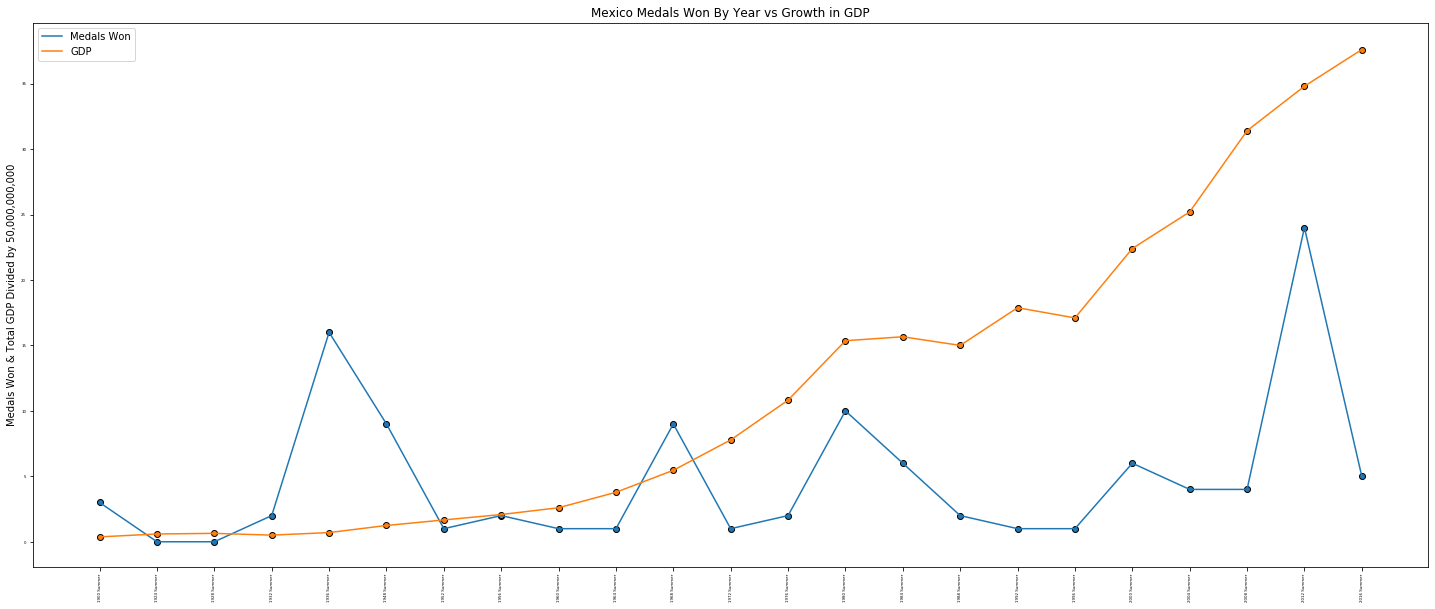

----------------------------------------------------------------------------------
The Correlation Coefficient between Medals Won and GDP Growth by Year for Mexico is 0.34


In [24]:
#Mexico Medal Winnings Over Time

#Creating data frame for only mexico
mexico_df = (merge_table.loc[merge_table["Country"] == "Mexico", :])

#Looking at only summer olympics
mexico_summer_df = (mexico_df.loc[mexico_df["Season"] == "Summer", :])
grouped_mexico_df = mexico_summer_df.groupby("Games")
grouped_mexico_counts = grouped_mexico_df.count()

#creating necessarily variables
x_axis = np.arange(1, len(grouped_mexico_df)+1, 1)
y_axis = grouped_mexico_counts["Medal"]
y_axis2 = grouped_mexico_df["Total GDP"].mean() / 50000000000
reset_index = grouped_mexico_counts.reset_index()
labels = reset_index["Games"]

#plotting data points
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.scatter(x_axis, y_axis2, marker="o", edgecolors="black")

#adding labels to the graph
plt.title("Mexico Medals Won By Year vs Growth in GDP")
plt.ylabel("Medals Won & Total GDP Divided by 50,000,000,000")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

#adding lines between the data points
plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis2)

#adding a legend
plt.legend(loc=0, labels=["Medals Won", "GDP"])

#saving figure
plt.savefig("Mexico Total GDP (Div. 50,000,000,000) vs Medals Won By Year", format="eps")

#showing the graph
plt.show()

#finding correlation coefficient between these two variables
r = st.pearsonr(y_axis, y_axis2)
print("----------------------------------------------------------------------------------")
print(f"The Correlation Coefficient between Medals Won and GDP Growth by Year for Mexico is {round(r[0],2)}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


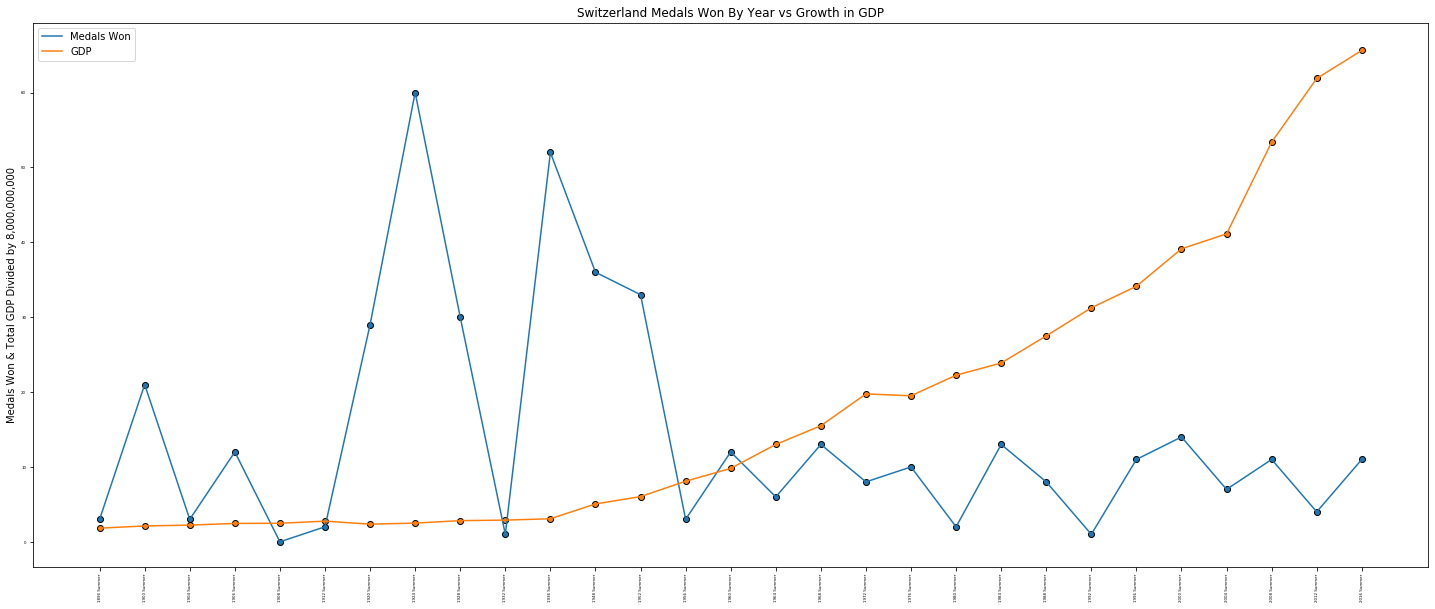

----------------------------------------------------------------------------------
The Correlation Coefficient between Medals Won and GDP Growth by Year for Switzerland is -0.3


In [23]:
#Switzerland Medal Winnings Over Time

#Creating data frame for only switzerland
switzerland_df = (merge_table.loc[merge_table["Country"] == "Switzerland", :])

#Looking at only summer olympics
switzerland_summer_df = (switzerland_df.loc[switzerland_df["Season"] == "Summer", :])
grouped_switzerland_df = switzerland_summer_df.groupby("Games")
grouped_switzerland_counts = grouped_switzerland_df.count()

#creating necessarily variables
x_axis = np.arange(1, len(grouped_switzerland_df)+1, 1)
y_axis = grouped_switzerland_counts["Medal"]
y_axis2 = grouped_switzerland_df["Total GDP"].mean() / 8000000000
reset_index = grouped_switzerland_counts.reset_index()
labels = reset_index["Games"]

#plotting data points
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.scatter(x_axis, y_axis2, marker="o", edgecolors="black")

#adding labels to the graph
plt.title("Switzerland Medals Won By Year vs Growth in GDP")
plt.ylabel("Medals Won & Total GDP Divided by 8,000,000,000")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

#adding lines between the data points
plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis2)

#adding a legend
plt.legend(loc=0, labels=["Medals Won", "GDP"])

#saving figure
plt.savefig("Switzerland Total GDP (Div. 8,000,000,000) vs Medals Won By Year", format="eps")

#showing the graph
plt.show()

#finding correlation coefficient between these two variables
r = st.pearsonr(y_axis, y_axis2)
print("----------------------------------------------------------------------------------")
print(f"The Correlation Coefficient between Medals Won and GDP Growth by Year for Switzerland is {round(r[0],2)}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


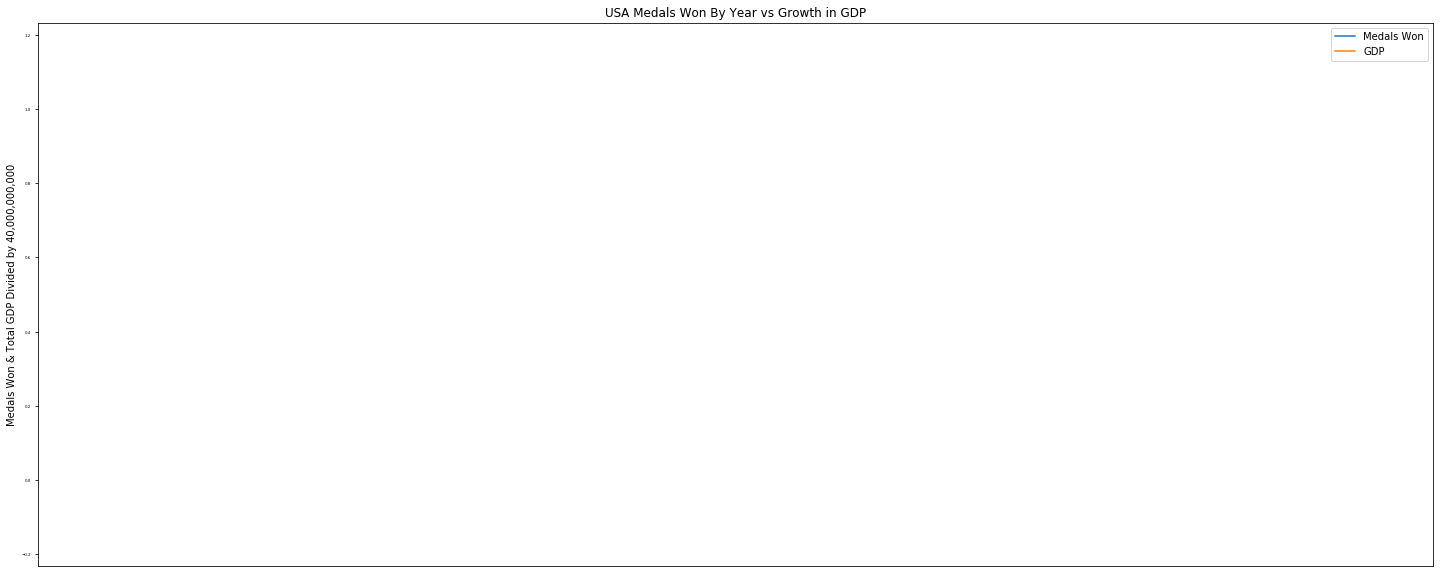

ValueError: x and y must have length at least 2.

In [25]:
#USA Medal Winnings Over Time

#Creating data frame for only usa
usa_df = (merge_table.loc[merge_table["Country"] == "United States", :])

#Looking at only summer olympics
usa_summer_df = (usa_df.loc[usa_df["Season"] == "Summer", :])
grouped_usa_df = usa_summer_df.groupby("Games")
grouped_usa_counts = grouped_usa_df.count()

#creating necessarily variables
x_axis = np.arange(1, len(grouped_usa_df)+1, 1)
y_axis = grouped_usa_counts["Medal"]
y_axis2 = grouped_usa_df["Total GDP"].mean() / 40000000000
reset_index = grouped_usa_counts.reset_index()
labels = reset_index["Games"]

#plotting data points
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.scatter(x_axis, y_axis2, marker="o", edgecolors="black")

#adding labels to the graph
plt.title("USA Medals Won By Year vs Growth in GDP")
plt.ylabel("Medals Won & Total GDP Divided by 40,000,000,000")
plt.xticks(x_axis, labels, rotation="vertical")
plt.tick_params(labelsize=4)

#adding lines between the data points
plt.plot(x_axis, y_axis)
plt.plot(x_axis, y_axis2)

#adding a legend
plt.legend(loc=0, labels=["Medals Won", "GDP"])

#saving figure
plt.savefig("USA Total GDP (Div. 40,000,000,000) vs Medals Won By Year", format="eps")

#showing the graph
plt.show()

#finding correlation coefficient between these two variables
r = st.pearsonr(y_axis, y_axis2)
print("----------------------------------------------------------------------------------")
print(f"The Correlation Coefficient between Medals Won and GDP Growth by Year for USA is {round(r[0],2)}")